## Laboratorio di Simulazione Numerica 

# ESERCITAZIONE 9 #

In questa esercitazione abbiamo risolto il problema del commesso viaggiatore (TSP). Data una serie di N città con corrispondenti posizioni $c_i$, il TSP consiste nel trovare il percorso più breve che il commesso deve compiere, partendo da una città fissata, per visitare tutte le città una volta sola tornando poi nella città da cui era partito. Per discriminare la lunghezza di un percorso rispetto ad un altro si fa uso della seguente funzione di costo:
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

dove $ \{ \vec{x}_i \} $ rappresenta le posizioni relative ad una particolare permutazione delle N città.

Per esprimere un particolare percorso abbiamo usato un vettore unidimensionale di dimensione N, i cui elementi erano tutti gli interi compresi tra 1 e N. Ad ogni intero infatti corrisponde una città, con la sua relativa posizione su un piano.

### esercizio 9.1 

In questo esercizio abbiamo dovuto implementare un algoritmo genetico (GA) per risolvere il problema del commesso viaggiatore. Il TSP ci è stato posto in due diverse modalità: in entrambi i casi con un numero di città $N=32$, rispettivamente poste in modo randomico su di una circonferenza oppure all'interno di un quadrato.

Dopo aver generato le posizioni di ogni singola città, abbiamo generato una prima popolazione di NN percorsi. Questa prima popolazione è stata generata in modo random, facendo permutazioni casuali tra gli elementi del vettore 1D composto da tutti gli interi da 1 a N. 
Per tutta la durata della simulazione abbiamo preso il seguente accorgimento: dal momento che la città di partenza è fissa, abbiamo arbitrariamente definito la prima come corrispondente al numero 1, e ci siamo sincerati che tale numero fosse nella prima casella di ogni percorso. In questo modo abbiamo ridotto la degenerazione del miglior percorso solo a 2 (che nel caso delle città su una circonferenza corrisponde allo stesso tragitto, percorso però o in senso orario o in senso antiorario).

Abbiamo implementato anche una funzione di check, molto utile in fase di realizzazione del programma, che controllasse che ogni popolazione generata fosse composta da percorsi che rispettavano le ipotesi del problema.

Data la prima popolazione abbiamo implementato una serie di funzioni che facessero evolvere tale popolazione in generazioni successive, allo scopo di ottenere, dopo un certo numero di generazioni, il miglior percorso che risolvesse il TSP.

Per prima cosa abbiamo scritto una funzione (riordina) che ordinasse i percorsi della popolazione secondo la funzione di costo $L^{(2)}$, dal migliore al peggiore. Dopodichè abbiamo creato una funzione (selection) utile a selezionare uno specifico percorso. Abbiamo optato per una legge di selezione del tipo: $j = NN\times r^p$, con $r$ un numero random tra 0 e 1 e $p$ un opportuno esponente.

Successivamente abbiamo implementato tre diverse funzioni di mutazione genetica:
- pair permut: scambia in modo random due città di uno stesso percorso (esclusa la prima).
- m_permut: scambia m città contigue (esclusa la prima e con $m<N/2$) con altre m città tra loro contigue.
- inversion: seleziona m città contigue (esclusa la prima e con $m<N$) e inverte l'ordine in cui sono poste.

Infine abbiamo scritto un operatore di crossover. Questo seleziona (con la funzione selection) due percorsi dalla popolazione, detti madre e padre e li taglia nella stessa posizione. Dopodichè lascia invariati le prime parti del percorso, mentre completa la seconda parte (quella successiva alla posizione di taglio) con le città mancanti, poste però nello stesso ordine in cui compagliono nel consorte. In questo modo si generano due percorsi figli che iniziano a popolare la successiva generazione.



#### città sulla circonferenza

Per questa versione del problema abbiamo optato per una popolazione di $NN=500$ percorsi. Per generare la popolazione successiva abbiamo applicato l'operatore di crossover con una probabilità del $75$ %. Questo vuol dire che mediamente in un quarto dei casi i figli sono uguali ai genitori. Successivamente, i figli così generati subiscono le tre mutazioni genetiche, ognuna delle quali con una probabilità di accadere del $15$ %. Ripetendo questo iter per 16 volte si ottiene una popolazione figlia dalla popolazione madre. Abbiamo in totale generato 500 generazioni.

Riportiamo di seguito i risultati ottenuti, sotto forma di quattro grafici. Il primo rappresenta il valore di $L^{(2)}$ del miglior percorso della popolazione in funzione delle generazioni. Il secondo il valore medio di $L^{(2)}$ (mediato sulla miglior metà della popolazione) in funzione del generazioni. il terzo il percorso iniziale. Il quarto il miglior percorso ottenuto al termine dell simulazione.

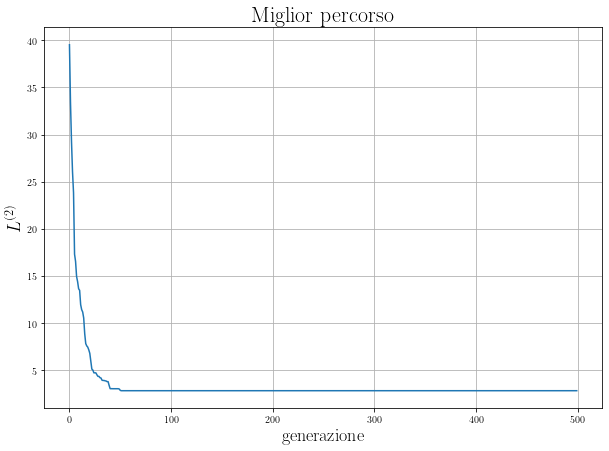

Percorso migliore =  2.84032


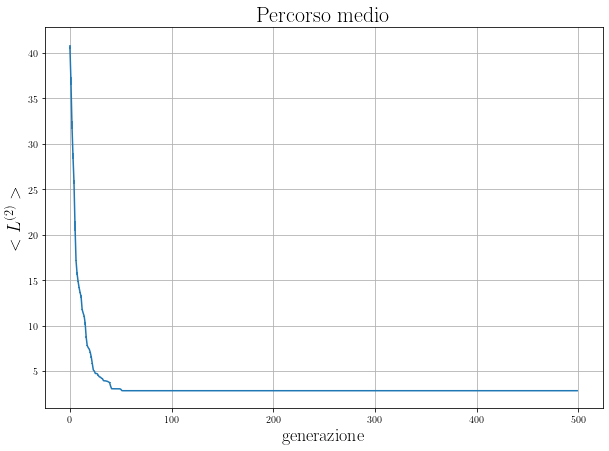

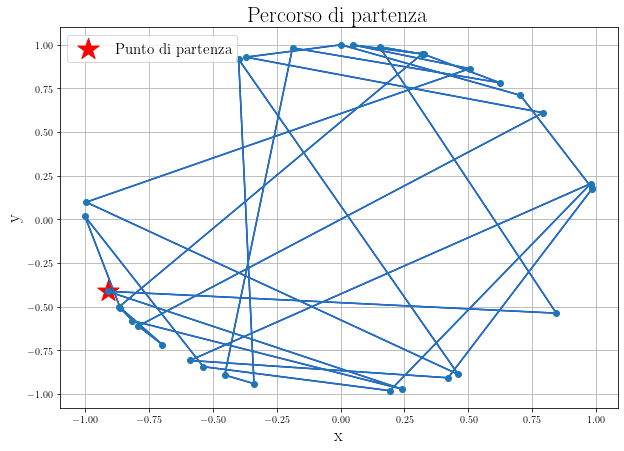

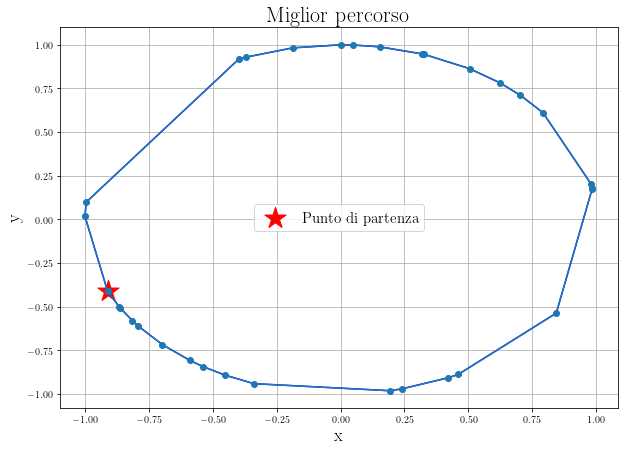

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

##L miglior percorso
x, f = np.loadtxt("L2_circle.txt", usecols=(0,1), unpack='true',  delimiter=',')

plt.figure(figsize=(10, 7))
plt.plot(x,f)
plt.xlabel('generazione', fontsize=18)
plt.ylabel('$L^{(2)}$', fontsize=18)
plt.title("Miglior percorso", fontsize=22)
plt.grid(True)
plt.show()

print('Percorso migliore = ', f[-1])

##valore medio
plt.figure(figsize=(10, 7))
x, f, error = np.loadtxt("ave_circle.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.errorbar(x,f ,yerr=error)

plt.xlabel('generazione', fontsize=18)
plt.ylabel('$<L^{(2)}>$', fontsize=18)
plt.title("Percorso medio ", fontsize=22)
plt.grid(True)
plt.show()

##percorso iniziale
plt.figure(figsize=(10, 7))
x, f = np.loadtxt("path_circle_start.txt", usecols=(0,1), unpack='true',  delimiter=',')

plt.plot(x,f, 'b')
plt.plot(x,f, marker='o')
plt.scatter(x[0], f[0], c='r', marker='*', s=500, label='Punto di partenza')
plt.title('Percorso di partenza', fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)
plt.show()

##miglior percorso
plt.figure(figsize=(10, 7))
x, f = np.loadtxt("path_circle.txt", usecols=(0,1), unpack='true',  delimiter=',')

plt.plot(x,f, 'b')
plt.plot(x,f, marker='o')
plt.scatter(x[0], f[0], c='r', marker='*', s=500, label='Punto di partenza')
plt.title('Miglior percorso', fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)
plt.show()



#### città dentro il quadrato

Per la simulazione di questa configurazione abbiamo seguito i medesimi procedimenti della configurazione precedente, cambiando tuttavia alcuni parametri numerici. Nello specifico:
- $r=2$
- $NN=500$
- probabilità di crossing: $55$ %
- probabilità di mutazione: $10$ %
- generazioni: $500$

Per quanto riguarda il numero di generazioni simulate, inizialmente avevamo stabilito che $NN=300$ fosse sufficiente. In seguito però ai risultati ottenuti nell'esercizio 10.2 ci siamo accorti che il percorso trovato rappresentava un minimo relativo, dal momento che con la computazione parallela implementata nell'esercitazione 10 ottenevamo un risultato, seppure di poco, migliore. Abbiamo così aumentato il numero di generazioni a 500, ottenendo effetivamente il percorso trovato nell'esercizio 10.2 

Riportiamo di seguito i risultati ottenuti.

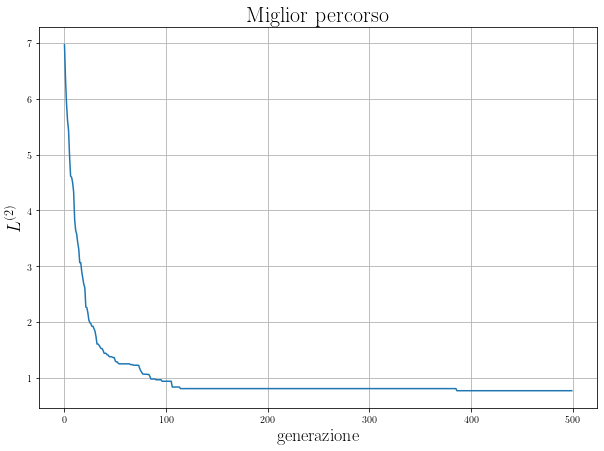

Percorso migliore =  0.767958
Percorso migliore alla generazione 200 =  0.805787


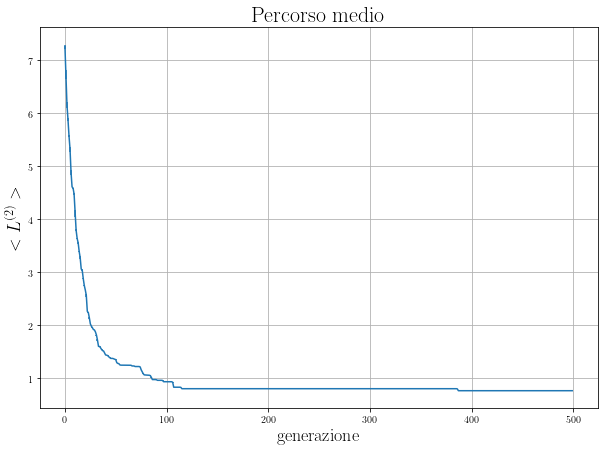

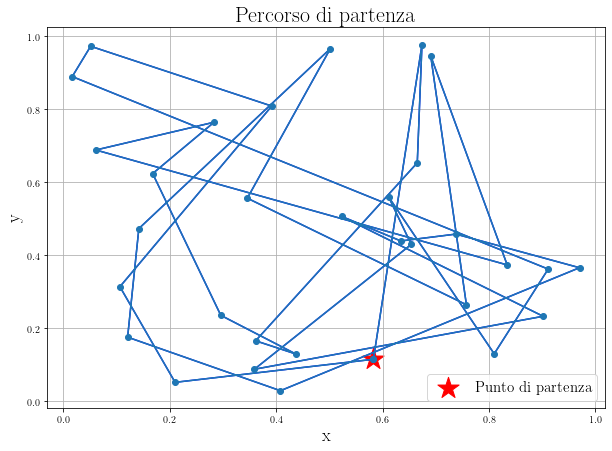

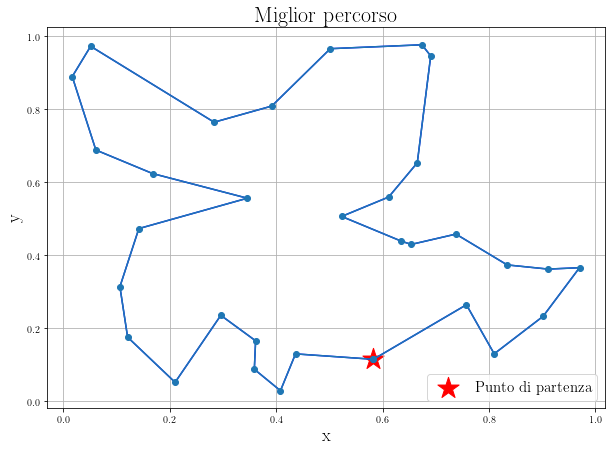

In [29]:
## L miglior percorso
x, f = np.loadtxt("L2_square.txt", usecols=(0,1), unpack='true',  delimiter=',')

plt.figure(figsize=(10, 7))
plt.plot(x,f)
plt.xlabel('generazione', fontsize=18)
plt.ylabel('$L^{(2)}$', fontsize=18)
plt.title("Miglior percorso", fontsize=22)
plt.grid(True)
plt.show()

print('Percorso migliore = ', f[-1])
print('Percorso migliore alla generazione 200 = ', f[199])

##valore medio
plt.figure(figsize=(10, 7))
x, f, error = np.loadtxt("ave_square.txt", usecols=(0,1,2), delimiter=', ', unpack='true')
plt.errorbar(x,f ,yerr=error)

plt.xlabel('generazione', fontsize=18)
plt.ylabel('$<L^{(2)}>$', fontsize=18)
plt.title("Percorso medio ", fontsize=22)
plt.grid(True)
plt.show()

##percorso iniziale
plt.figure(figsize=(10, 7))
x, f = np.loadtxt("path_square_start.txt", usecols=(0,1), unpack='true',  delimiter=',')

plt.plot(x,f, 'b')
plt.plot(x,f, marker='o')
plt.scatter(x[0], f[0], c='r', marker='*', s=500, label='Punto di partenza')
plt.title('Percorso di partenza', fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)
plt.show()

##miglior percorso
plt.figure(figsize=(10, 7))
x, f = np.loadtxt("path_square.txt", usecols=(0,1), unpack='true',  delimiter=',')

plt.plot(x,f, 'b')
plt.plot(x,f, marker='o')
plt.scatter(x[0], f[0], c='r', marker='*', s=500, label='Punto di partenza')
plt.title('Miglior percorso', fontsize=22)
plt.legend(loc='best', fontsize=15)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)
plt.show()
